In [ ]:
import imageio
import torchvision.transforms as T
from torchvision.io import read_image
import torch
import numpy as np

IMAGENET_MEAN = [0.5, 0.5, 0.5]
IMAGENET_STD = [0.5, 0.5, 0.5]

INV_IMAGENET_MEAN = [-m for m in IMAGENET_MEAN]
INV_IMAGENET_STD = [1.0 / s for s in IMAGENET_STD]

def rescale(x):
    lo, hi = x.min(), x.max()
    return x.sub(lo).div(hi - lo)

def image_unnormalize(rescale_image=False):
    transforms = [
        T.Normalize(mean=[0, 0, 0], std=INV_IMAGENET_STD),
        T.Normalize(mean=INV_IMAGENET_MEAN, std=[1.0, 1.0, 1.0]),
    ]
    if rescale_image:
        transforms.append(rescale)
    return T.Compose(transforms)

def image_unnormalize_batch(imgs, rescale=False):
    """
    Input:
    - imgs: FloatTensor of shape (N, C, H, W) or (C, H, W) giving preprocessed images

    Output:
    - imgs_de: ByteTensor of shape (N, C, H, W) or (C, H, W) giving deprocessed images
      in the range [0, 255]
    """
    # if isinstance(imgs, torch.autograd.Variable):
    #   imgs = imgs.data
    # imgs = imgs.cpu().clone()
    deprocess_fn = image_unnormalize(rescale_image=rescale)
    imgs_de = []
    if imgs.dim() == 4:
        for i in range(imgs.size(0)):
            img_de = deprocess_fn(imgs[i])[None]
            # img_de = img_de.mul(255).clamp(0, 255).byte()
            # img_de = img_de.mul(255).clamp(0, 255)
            imgs_de.append(img_de)
        imgs_de = torch.cat(imgs_de, dim=0)
        return imgs_de
    elif imgs.dim() == 3:
        img_de = deprocess_fn(imgs)
        return img_de
    else:
        raise NotImplementedError

img_tensor = (read_image("C:/Users/gamew/Downloads/0_0_201.80190587043762.png") / 255)

tmp_img = image_unnormalize_batch(img_tensor).clamp(0.0, 1.0)
# tmp_img = img_tensor
print(tmp_img.shape)

imageio.imsave(
    uri="test.png",
    im=(tmp_img.cpu().detach().numpy().transpose(1, 2, 0) * 255).astype(np.uint8),  # (H, W, C) numpy
)

torch.Size([3, 256, 256])


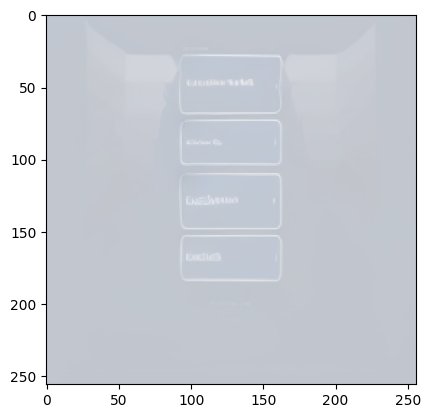

In [19]:
import matplotlib.pyplot as plt

plt.imshow(image_unnormalize()(img_tensor).permute(1, 2, 0))

In [21]:
import json

rawList = """LineBreak
generic
img
StaticText
link
heading
figure
paragraph
listitem
navigation
menuitem
banner
button
Pre
textbox
combobox
Iframe
list
searchbox
columnheader
gridcell
rowheader
superscript
LabelText
separator
strong
FooterAsNonLandmark
IframePresentational
checkbox
status
listbox
alert
code
HeaderAsNonLandmark
row
DescriptionListDetail
Abbr
DescriptionListTerm
time
insertion
LayoutTableCell
LayoutTableRow
LayoutTable
article
slider
Figcaption
Section
tab
complementary
main
emphasis
dialog
radio
DescriptionList
caption
contentinfo
Legend
note
treeitem
blockquote
region
Canvas
deletion
option
group
PluginObject
RootWebArea
ListMarker
subscript
spinbutton
progressbar
search
graphics-symbol
SvgRoot
DisclosureTriangle
tablist
mark
EmbeddedObject
document
tooltip
log"""

elList = rawList.split("\n")

In [ ]:
idx2class = dict(zip(range(1, len(elList) + 1), elList))
class2idx = dict(zip(elList, range(1, len(elList) + 1)))

idx2class[0] = "OTHER"
class2idx["OTHER"] = 0

In [37]:
json.dump({"idx2Label": idx2class, "label2Idx": class2idx}, open("class_map.json", "w+"))

In [51]:
import torch

torch.nn.functional.pad(
    torch.zeros((10, 80)),
    (0, 10 - 80),
    mode="constant",
    value=0,
).shape

torch.Size([10, 10])

In [43]:
len([class2idx[i[0]] for i in [ [ "LineBreak" ], [ "StaticText" ], [ "LineBreak" ], [ "StaticText" ], [ "img", "link" ], [ "img", "link" ], [ "StaticText" ], [ "StaticText" ], [ "StaticText" ], [ "StaticText", "link" ], [ "StaticText", "link" ], [ "StaticText", "link" ], [ "StaticText", "link" ], [ "StaticText", "heading" ], [ "StaticText" ], [ "StaticText" ], [ "StaticText" ], [ "StaticText" ], [ "StaticText" ], [ "StaticText" ], [ "StaticText" ], [ "StaticText" ], [ "StaticText" ], [ "StaticText" ], [ "StaticText" ], [ "StaticText" ], [ "StaticText" ], [ "StaticText" ], [ "StaticText" ], [ "StaticText" ], [ "StaticText", "heading" ], [ "StaticText", "paragraph" ], [ "StaticText", "heading" ], [ "StaticText" ], [ "StaticText" ], [ "StaticText", "heading" ], [ "StaticText", "paragraph" ], [ "StaticText", "paragraph" ], [ "StaticText", "link", "listitem" ], [ "StaticText", "link", "listitem" ], [ "StaticText", "link" ], [ "StaticText", "link" ], [ "StaticText", "link", "listitem" ], [ "StaticText", "link" ], [ "StaticText", "link" ], [ "StaticText", "link" ], [ "StaticText", "link" ], [ "StaticText", "link" ], [ "StaticText", "link" ], [ "StaticText", "link" ], [ "StaticText", "link" ], [ "StaticText", "link" ], [ "StaticText", "link" ], [ "StaticText", "link" ], [ "StaticText", "link" ], [ "StaticText", "link" ], [ "StaticText", "link" ], [ "StaticText", "link" ], [ "StaticText", "link" ], [ "StaticText", "link" ], [ "StaticText", "link" ], [ "StaticText", "link" ], [ "StaticText" ], [ "StaticText" ], [ "StaticText", "link" ], [ "StaticText" ], [ "StaticText" ], [ "StaticText" ], [ "StaticText" ], [ "StaticText" ], [ "StaticText" ], [ "StaticText" ], [ "StaticText" ], [ "StaticText" ], [ "StaticText", "link" ], [ "StaticText", "link" ], [ "StaticText", "link" ], [ "StaticText", "link" ], [ "StaticText", "link" ], [ "StaticText", "link" ] ]])

80